# Exercise 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

## ===============
## Part 1 Linear Regression with one variable

### Read data from source file

In [2]:
data = pd.read_table('ex1data1.txt', sep=',', names=['x', 'y'])
data.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Extract X and y, and scatter plot to get overview of the data

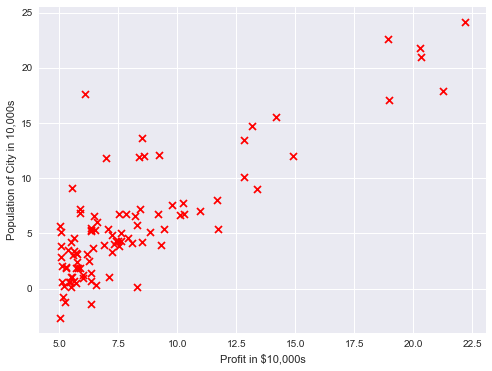

In [3]:
X = data.x
y = data.y
plt.figure(figsize=(8,6))
plt.scatter(X, y, c='red', marker='x')
plt.xlabel('Profit in $10,000s')
plt.ylabel('Population of City in 10,000s')
plt.show()

### Prep X and y for computing

In [4]:
m = len(y)
X = np.c_[np.ones((m, 1)), data.x]    # Add the a column of ones
y = y.values.reshape(m, 1)            # Reshape y to m*1 size
print(X.shape)
X[:5]

(97, 2)


array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

### Cost function for one variable

In [5]:
def computeCost(X, y, theta):
    '''Return the cost by matrix opertaions'''
    theta = np.array(theta).reshape(2, 1)
    return ((X @ theta - y).T @ (X @ theta - y) / 2 / len(y)).flatten()

### Initialize theta, interation limit and alpha

In [6]:
theta = np.zeros((2, 1))
iterations = 1500
alpha = 0.01

### Compute cost of initial theta and test with another theta

In [7]:
J = computeCost(X, y, theta)
print('With theta = [0, 0] the cost J is: ', J)

theta = [-1, 2]
J = computeCost(X, y, theta)
print('With theta = [-1, 2] the cost J is: ', J)

With theta = [0, 0] the cost J is:  [32.07273388]
With theta = [-1, 2] the cost J is:  [54.24245508]


### Gradient Descent function for one variable

In [8]:
def gradientDescent(X, y, theta, alpha, num_iters):
    '''Implement gradient descent to compute the cost of one variable'''
    m = len(y)
    theta = np.array(theta).reshape(2, 1)
    J_history = np.zeros((num_iters, 1))
    for iter in range(num_iters):
        theta1_new = theta[0] - X[:, 0].T @ (X @ theta - y) * alpha / m
        theta2_new = theta[1] - X[:, 1].T @ (X @ theta - y) * alpha / m
        theta = np.array([theta1_new, theta2_new]).reshape(2, 1)
        J_history[iter] = computeCost(X, y, theta)
    
    return theta.flatten()

### Compute theta using the gradient descent function

In [9]:
theta = np.zeros((2, 1))
theta = gradientDescent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent: ', theta)

Theta found by gradient descent:  [-3.63029144  1.16636235]


### Plot the linear fit

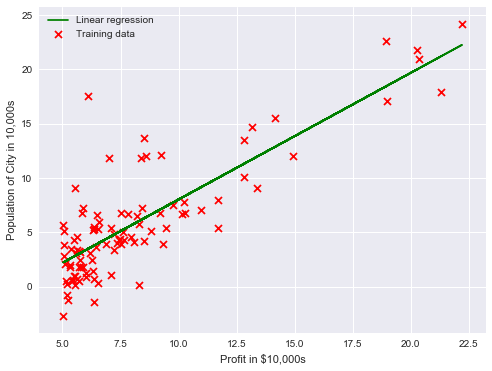

In [10]:
plt.figure(figsize=(8,6))
plt.plot(X[:, 1], X @ theta, 'g-')
plt.scatter(X[:, 1], y, c='red', marker='x')
plt.xlabel('Profit in $10,000s')
plt.ylabel('Population of City in 10,000s')
plt.legend(['Linear regression', 'Training data'])
plt.show()

### Predicitons

In [11]:
predict1 = [1, 3.5] @ theta
predict2 = [1, 7] @ theta
print('For population=35,000, we predict a profit of ', predict1*10000)
print('For population=70,000, we predict a profit of ', predict2*10000)

For population=35,000, we predict a profit of  4519.767867701772
For population=70,000, we predict a profit of  45342.45012944714


### Contour plot

In [12]:
theta0_vals = np.linspace(-40, 40, 200)
theta1_vals = np.linspace(-40, 40, 200)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        J_vals[i, j] = computeCost(X, y, [theta0_vals[i], theta1_vals[j]])

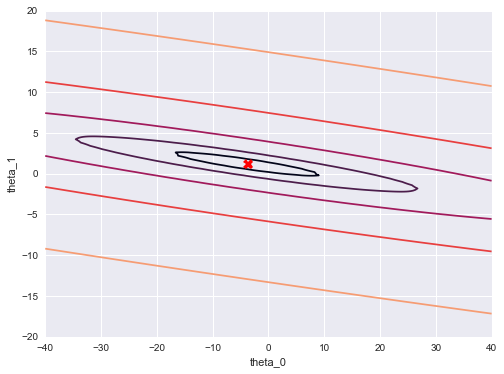

In [13]:
plt.figure(figsize=(8, 6))
plt.contour(theta0_vals, theta1_vals, np.log(J_vals.T))
plt.plot(theta[0], theta[1], 'rX', markersize=10)
plt.xlim(-40,40)
plt.ylim(-20,20)
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.show()

## ===============
## Part 2 Linear Regression with multiple variables

### Read data

In [14]:
data = pd.read_table('ex1data2.txt', sep=',', names=['x1', 'x2', 'y'])
data.head()

,x1,x2,y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### Split X and y

In [15]:
m = len(data)
X = data[['x1', 'x2']].values
y = data.y.values.reshape(m, 1)
print(X.shape)
X[:5]

(47, 2)


array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4]])

### Define normalize function and apply to X

In [16]:
def featureNormalize(X):
    '''Return normalized feature values and its mean and standard deviationbased on standard 
    deviation with ddof=1'''
    return (X - X.mean(axis=0)) / X.std(axis=0, ddof=1), X.mean(axis=0), X.std(axis=0, ddof=1)

X, mu, sigma = featureNormalize(X)
X = np.c_[np.ones((m, 1)), X]
X[:5]

array([[ 1.        ,  0.13000987, -0.22367519],
       [ 1.        , -0.50418984, -0.22367519],
       [ 1.        ,  0.50247636, -0.22367519],
       [ 1.        , -0.73572306, -1.53776691],
       [ 1.        ,  1.25747602,  1.09041654]])

### Cost function and Gradient descent for multiple variables

In [17]:
def computeCostMulti(X, y, theta):
    '''Return cost values of X and y given the thata values '''
    num_col = X.shape[1]
    theta = np.array(theta).reshape(num_col, 1)
    return ((X @ theta - y).T @ (X @ theta - y) / (2 * X.shape[0])).flatten()

def gradientDescentMulti(X, y, theta, alpha, num_iters, threshold):
    '''Return the theta values and cost values computed for X and y, given an initial theta, 
    a learning rate alpha, a fixed max iteration limit num_iters and a threshold.'''
    m = len(y)
    num_col = X.shape[1]
    theta = np.array(theta).reshape(num_col, 1)
    J_history = np.zeros((num_iters, 1))
    for iter in range(num_iters):
        theta_new = np.zeros((num_col, 1))
        for i in range(num_col):
            theta_new[i] = theta[i] - (X[:, i].T @ (X @ theta - y)) * alpha / m
        theta = theta_new
        J = computeCostMulti(X, y, theta)
        if iter > 0:
            if J_history[iter-1] - J > threshold:
                if iter == num_iters - 1:
                    print('All iterations completed. Threshold not reached.')
            else:
                print('Output already meets the threshold.')
                break
        J_history[iter] = J      
    return theta.flatten(), J_history.flatten()

### Initialize the parameters and run the gradient descent

In [18]:
alpha = .01
num_iters = 400
theta = np.zeros((X.shape[1], 1))

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters, 0.0000001)

All iterations completed. Threshold not reached.


In [19]:
print('Means of features: \n', mu)
print('\nStandard deviations of features: \n', sigma)
print('\nFinal theta values: \n', theta)
print('\nFirst final cost values: \n', J_history[:5])

Means of features: 
 [2000.68085106    3.17021277]

Standard deviations of features: 
 [7.94702354e+02 7.60981887e-01]

Final theta values: 
 [334302.06399328 100087.11600585   3673.54845093]

First final cost values: 
 [6.43007496e+10 6.30367950e+10 6.17991118e+10 6.05871404e+10
 5.94003332e+10]


### Plot the cost curve vs interations

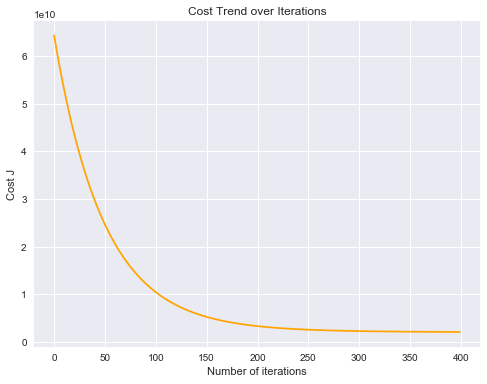

In [20]:
plt.figure(figsize=(8,6))
plt.plot(range(num_iters), J_history, 'orange')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Cost Trend over Iterations')
plt.show()

### Prediction

In [21]:
price1 = theta[0] + (1650-mu[0])/sigma[0]*theta[1] + (3-mu[1])/sigma[1]*theta[2]
print('Predicted price of a 1650 sq-ft, 3 br house using gradient descent: \n', price1)

Predicted price of a 1650 sq-ft, 3 br house using gradient descent: 
 289314.6203377763


### Using normal equations

In [22]:
def normalEqn(X, y):
    '''Return theta values of linear regression computed with normal equation'''
    return (np.linalg.pinv(X.T @ X) @ X.T @ y).flatten()

In [23]:
m = len(data)
X = data[['x1', 'x2']].values
X = np.c_[np.ones((m, 1)), X]
y = data.y.values.reshape(m, 1)
theta = normalEqn(X, y)

print('Theta computed from the normal equations: :\n', theta)

Theta computed from the normal equations: :
 [89597.90954355   139.21067402 -8738.01911255]


### Prediction

In [24]:
price2 = theta[0] + theta[1] * 1650 + theta[2] * 3
print('Predicted price of a 1650 sq-ft, 3 br house using normal equation: \n', price2)

Predicted price of a 1650 sq-ft, 3 br house using normal equation: 
 293081.464334972


### Different learning rates

All iterations completed. Threshold not reached.


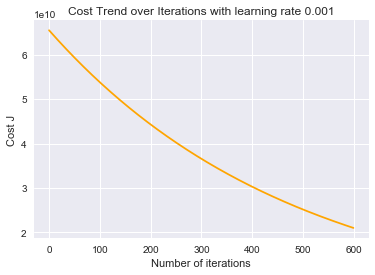



All iterations completed. Threshold not reached.


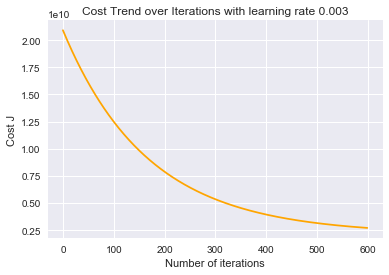



All iterations completed. Threshold not reached.


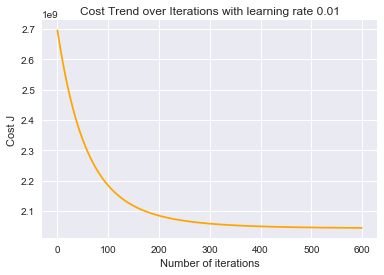



All iterations completed. Threshold not reached.


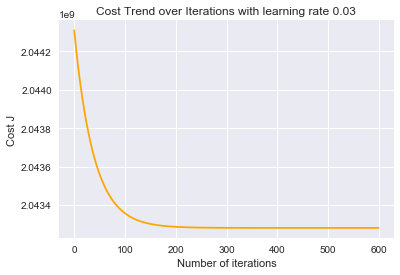



Output already meets the threshold.


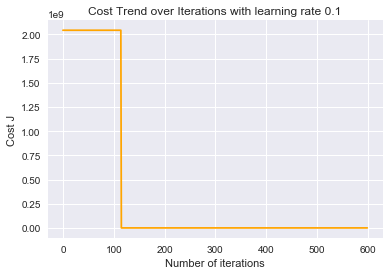



Output already meets the threshold.


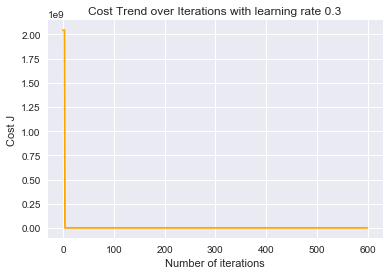

In [25]:
alpha = [.001, .003, .01, .03, .1, .3]
num_iters = 600
theta = np.zeros((X.shape[1], 1))
for al in alpha:
    X = data[['x1', 'x2']].values
    X, mu, sigma = featureNormalize(X)
    X = np.c_[np.ones((m, 1)), X]
    y = data.y.values.reshape(m, 1)
    
    theta, J_history = gradientDescentMulti(X, y, theta, al, num_iters, 0.0000001)
    
    plt.plot(range(num_iters), J_history, 'orange')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost J')
    plt.title('Cost Trend over Iterations with learning rate {}'.format(al))
    plt.show()
    print('\n')

